# Feuille 3

L'objectif de ce TP est de **calculer et tracer l'enveloppe convexe d'un nuage de points du plan**. L'algorithme de ce calcul utilise des piles.
Les notions utiles seront introduites au fur et à mesure.

-   Ce TP peut profiter d'une implémentation python du type de données abstrait *pile LIFO*.
-   Le travail demandé sera effectué dans ce notebook jupyter.
-   Dans le notebook, les *modules* demandés pourront être codés par des fonctions ou des traitements regroupés dans une cellule. 
- Accompagner chaque développement de son test unitaire de validation.
-   Dans un second temps, les traitements demandés pourront être regroupés dans des fichiers python (`.py`) exécutables depuis la ligne de commande.

In [1]:
# on regroupe les imports utiles
from math import sqrt
from random import uniform
import matplotlib.pyplot as plt

## Points du plan, relation d'ordre

Un *point* du plan est un couple $(x, y)$ (de nombres flottants).  
On définit la relation d'ordre suivante entre 2 points du plan :  
$$(x,y) \le (x',y') \iff x < x' \text{ ou } (x = x' \text{ et } y \le y').$$  
Un *nuage de points* est un ensemble fini de points.

### `points`

Concevoir et coder un module `points` qui permet de définir des points,
de les comparer, d'afficher leurs coordonnées $(x,y)$ à l'écran.

In [2]:
def creerPoint(x:float , y:float)-> tuple[float]:
    return(x,y)

def comparerPoint(a:tuple[float],b:tuple[float])->bool:
    if a[0]<b[0] or (a[0]==b[0] and a[1]<=b[1]):
        return True
    return False

def afficherPoint(a):
    print("coordonée du point:",a)

In [3]:
#test afficherPoint
afficherPoint(creerPoint(2,3))

coordonée du point: (2, 3)


In [4]:
#autovalidation pour la fonction creerPoint
assert creerPoint(2,3)==(2,3)

In [5]:
#autovalidation pour la fonction comparer point
assert comparerPoint((1,3),(2,3)) == True
assert comparerPoint((2,3),(2,3)) == True
assert comparerPoint((2,2),(2,3)) == True
assert comparerPoint((2,5),(2,3)) == False

## `Nuage de points : générer, trier, afficher, stocker, tracer

### `nuage`

Ecrire un module `nuage` qui permet de définir un nuage de points de
taille paramétrable et de d'afficher les coordonnées de ses points à
l'écran.

![Un nuage de points aléatoires](./fig/nuage.png)

In [6]:
def definirNuage(x:list[float],y:list[float],t:int) -> list[tuple] :
    nuagePoint=list(zip(x,y))
    return nuagePoint 

In [7]:
#test definirNuage
x = [1,2,3,4,5,6,7,8]
y = [4,1,3,6,1,3,5,2]
assert definirNuage(x,y,8)==[(1,4),(2,1),(3,3),(4,6),(5,1),(6,3),(7,5),(8,2)]

In [8]:
def afficherNuage(x) :
    print(x)

In [9]:
#test afficherNuage
afficherNuage(definirNuage(x,y,8))

[(1, 4), (2, 1), (3, 3), (4, 6), (5, 1), (6, 3), (7, 5), (8, 2)]


### `un_nuage_random()`

Compléter ce module de façon à pouvoir générer aléatoirement un nuage de
points de taille arbitraire et contenu dans le carré
$[0,1] \times [0,1]$.

In [10]:
def un_nuage_random(t:int) -> list[tuple] :
    x,y=[],[]
    for i in range(t) :
        x.append(uniform(0,1))
        y.append(uniform(0,1))
    n=definirNuage(x,y,t)
    return n

In [11]:
#test de la focntion un_nuage_random
un_nuage_random(8)

[(0.5242544565734751, 0.018644504993919453),
 (0.15484572521838913, 0.8630313337942395),
 (0.1704944555375909, 0.9655740217536378),
 (0.44537055820518645, 0.8264948764435095),
 (0.741264071829934, 0.34075847426825867),
 (0.21047230715967546, 0.7798634369226439),
 (0.5332304133934647, 0.7410512179537053),
 (0.46129253374888957, 0.7964816099693786)]

### `trier_nuage()`

Compléter ce module de façon à pouvoir trier les points d'un nuage donné selon l'ordre croissant défini sur les points du plan.

In [12]:
def trier_nuage(n:list[tuple],t:int) -> list[tuple]:
    n.sort()#respecte la relation d'ordre suivante entre 2 points
    return n

In [13]:
#test trier_nuage
a=un_nuage_random(10)
print(a)
trier_nuage(a,5)

[(0.6891098970559844, 0.9508743844246551), (0.7355503931095468, 0.8478700884723861), (0.5349066513200669, 0.748124722771872), (0.9384835858183413, 0.38538670548733045), (0.520443797812007, 0.9747262057250777), (0.5899993438766915, 0.3617642074150911), (0.048440903402980795, 0.9034152682051771), (0.10764656111249848, 0.43671866662199843), (0.09360468200046113, 0.06165238418128971), (0.1802466517704674, 0.8544520267947693)]


[(0.048440903402980795, 0.9034152682051771),
 (0.09360468200046113, 0.06165238418128971),
 (0.10764656111249848, 0.43671866662199843),
 (0.1802466517704674, 0.8544520267947693),
 (0.520443797812007, 0.9747262057250777),
 (0.5349066513200669, 0.748124722771872),
 (0.5899993438766915, 0.3617642074150911),
 (0.6891098970559844, 0.9508743844246551),
 (0.7355503931095468, 0.8478700884723861),
 (0.9384835858183413, 0.38538670548733045)]

### `write_nuage()`

Compléter ce module de façon à pouvoir enregistrer un nuage de points de taille arbitraire dans un fichier de texte. La taille du nuage sera aussi enregistrée dans ce fichier.  
Les fichiers `data_nuage_10.txt` et `data_nuage_100.txt` fournis dans l'archive `3-data-nuage.zip` sont des exemples de tels fichiers.

In [14]:
def write_nuage(t:int) :
    n=un_nuage_random(t)
    with open('data_nuage.txt', 'w') as f:
        f.write(f"{t}\n")
        for i in range(len(n)) :
            f.write(f"{n[i][0]} ")
            f.write(f"{n[i][1]}\n")

In [15]:
#test on remarque la creation du fichier data_nuage.txt dans le repartoire 
write_nuage(10)

### `read_nuage()`

Compléter ce module de façon à pouvoir lire un nuage de points de taille arbitraire à partir d'un fichier de texte selon le format défini ci-dessus.

In [16]:
def read_nuage(fichier:str) -> list[tuple]:
    f = open(fichier, "r")
    x,y=[],[]
    t=int(f.readline()[:-1])
    i=t
    while i :
        i-=1
        thisLine=f.readline()[:-1].split()
        x.append(float(thisLine[0]))
        y.append(float(thisLine[1]))
    f.close()
    thisPoints=[]
    for j in range(len(x)):
        thisPoints.append(creerPoint(x[j],y[j]))   
    return thisPoints

In [17]:
#test
print(read_nuage("data_nuage.txt"))

[(0.5312014585691576, 0.5513308916828887), (0.49287043101780037, 0.30004501239537784), (0.8600022079255358, 0.20732482399101793), (0.3635051530713307, 0.8127914496877612), (0.8341884724833611, 0.8488522086729253), (0.745093566991155, 0.22442498397223143), (0.9250620352674325, 0.9512023099294868), (0.9770480304678019, 0.23712326521410998), (0.9276642131923992, 0.7899018117038894), (0.11216746732593386, 0.44418858479459)]


### `aff_nuage()`

Compléter ce module de façon à pouvoir tracer graphiquement un nuage de
points donné. Le tracé sera effectué à l'écran par défaut. Il permettra
aussi de stocker ce tracé dans un fichier `jpeg`.

In [18]:
def aff_nuage(points:list[tuple]):
    x,y=[],[]
    for i in range(len(points)) :
        x.append(points[i][0])
        y.append(points[i][1])
    plt.scatter(x,y,marker = 'o')
    plt.savefig("trace.jpeg")

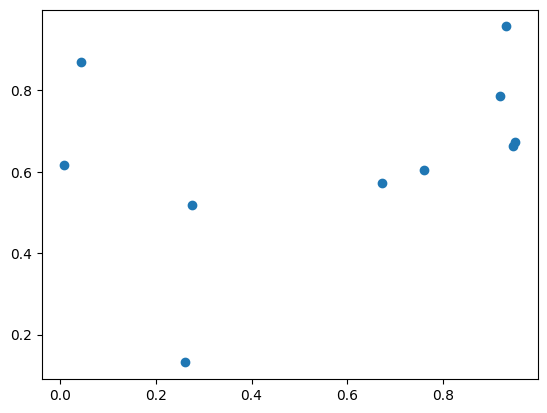

In [19]:
#test on remarque la creation du fichier trace.jpeg de dans le repartoire 
aff_nuage(un_nuage_random(10))

## Orientation de 3 points du plan

On va développer progressivement un module `geometrie2d`.

On commence avec la détermination de l'orientation d'un triplet de points.

![Orientations d'un triplet (p,q,r)](./fig/orientation_pqr.png)

Un triplet `(p,q,r)` de points *non alignés* du plan est *orienté
positivement* si l'angle des vecteurs `(pq, pr)` est dans $]0, \pi \ [$
(modulo $2\pi$). Sinon, il est *orienté négativement*.

On vérifie l'orientation du triplet `(p,q,r)` en calculant le signe du
déterminant 2x2 $det(pq,pr)$ des vecteurs `pq` et `pr`. Signe du
déterminant et sens d'orientation coïncident.

On rappelle que :
$$det(pq,pr) = (x_q - x_p)\times(y_r - y_p) - (y_q - y_p)\times(x_r -
x_p).$$

### `orientation()`

Commencer le module `geometrie2d` avec une fonction qui calcule l'orientation d'un triplet de points du plan.

In [20]:
def orientation(p:tuple,q:tuple,r:tuple)-> float:
        det = (q[0] - p[0])*(r[1] - p[1]) - (q[1] - p[1])*(r[0] - p[0])
        #assert det!=0 #triplet (p,q,r) de points non alignés
        return det

## `geometrie2d`: enveloppe convexe

Un ensemble $C$ est *convexe* si le segment \[p,q\] qui relie deux
points quelconques de $C$ est inclus dans $C$.

![exemple d'ensembles convexes et non
convexe](./fig/convexes.png)

L'*enveloppe convexe* $Conv(N)$ d'un nuage de points $N$ est le plus
petit polygone convexe qui contient tous les points de $N$.

![L'enveloppe convexe du nuage de points
‘data_nuage_10.txt'](./fig/env_conv10.png) ![L'enveloppe
convexe du nuage de points
‘data_nuage_100.txt'](./fig/env_conv100.png)

### Construire l'enveloppe convexe d'un nuage de points 

Il existe plusieurs algorithmes. 
Nous utiliserons l'algorithme de Graham-Andrew qui s'appuie sur un balayage du nuage de points préalablement triés. 

**Hypothèse importante : aucun triplet de points alignés**

Dans un premier temps, il est plus facile de supposer qu'aucun triplet $(p, q, r)$ du nuage de points ne sont alignés.

On choisira d'arrêter le traitement d'un éventuel nuage qui ne vérifie pas cette hypothèse.

**Algorithme de Graham-Andrew.**

On construit $Conv(N)$ en balayant de gauche à droite avec une droite verticale le
nuage $N$ préalablement trié par ordre croissant. 
On convient ainsi que p0 est le plus petit point de N, *ie.* celui le plus à gauche.

Chaque point p rencontré par la droite met à jour l'enveloppe convexe du sous-nuage à gauche du point p.  
Cette mise à jour s'effectue en distinguant une partie supérieure et une partie inférieure de l'enveloppe convexe.

L'*enveloppe supérieure* est au dessus du segment \[p0, p\]. 
Cette enveloppe `ES` est modifiée par l'algorithme suivant qui justifie de stocker `ES` comme une pile de base p0. On ajoute aussi à `ES`, p1 le point immédiatement supérieur à p0 (*ie.* immédiatement à droite de p0).
La pile `ES` est ainsi composée d'au moins deux éléments.

Soit p le point rencontré par le balayage de N. 
Notons q et r les deux derniers points ajoutés à `ES` -- q est au sommet.

-   Si le triplet (p,q,r) est orienté positivement alors p est ajouté à
    `ES`. Ce qui termine la mise à jour de `ES`.
-   Sinon q est retiré de `ES` et on reprend le test d'orientation et le
    traitement précédent pour **un nouveau triplet (p,q,r)** jusqu'à
    terminer la mise à jour de `ES` :
    -   par l'ajout de p à `ES`  
    -   ou parce qu'il ne reste que p0 dans `ES`. Dans ce cas, on
        termine en ajoutant p à `ES` – qui est ainsi toujours composée
        d'au moins deux éléments.

`ES` contient l'enveloppe convexe supérieure du nuage N une fois tous
les points p de N balayés.

On convient aisément que le point le plus à droite de N est le dernier
point ajouté à `ES`.

**Illustration graphique.**

`ES` = {0,1,5,6}, début du traitement de p = 7

![Orientation (7,6,5) négative](./fig/ES-1.png)

`ES` = {0,1,5}, p = 7

![Orientation (7,5,1) négative](./fig/ES-2.png)

`ES` = {0,1}, p = 7

![Orientation (7,1,0) positive](./fig/ES-3.png)

`ES` = {0,1,7}, fin du traitement de p = 7.

### `maj_es()` : enveloppe convexe supérieure

Compléter le module précédent avec une fonction `majES(pile, point)` qui
effectue la mise à jour de la pile `ES` lors du traitement du point p. 

In [21]:
def majES(pile:list[tuple], point:tuple)-> list[tuple]:
    pile.append(point)
    pileES=[]
    for p in reversed(pile):
        while len(pileES) >= 2 and orientation(pileES[-2],pileES[-1],p) <= 0:
            pileES.pop()
        pileES.append(p)
    pileES.reverse()
    return pileES

### `maj_ei()`: enveloppe convexe inférieure 

L'*enveloppe convexe inférieure* est obtenue de façon similaire avec une
(autre) pile ‘EI' et un test d'orientation inverse.

Compléter le module précédent avec une fonction `majEI(pile, point)` qui
effectue la mise à jour de la pile ‘EI' lors du traitement du point p. 

In [35]:
def majEI(pile:list[tuple], point:tuple)-> list[tuple]:
    pile.append(point)
    pileEI=[]
    for p in pile:
        while len(pileEI) >= 2 and orientation(pileEI[-2],pileEI[-1],p) <= 0:
            pileEI.pop()
        pileEI.append(p)
    return pileEI

### Validation

Valider les deux fonctions précédentes sur des nuages de 5 ou 6 points.

In [36]:
assert majES([(1,1),(2,5),(4,3),(5,2)],(6,4))==[(1, 1), (2, 5), (6, 4)]
assert majEI([(1,1),(2,5),(4,3),(5,2)],(6,4))==[(1, 1), (5, 2), (6, 4)]

(1, 1) (2, 5) (4, 3)
(1, 1) (4, 3) (5, 2)


In [38]:
# PhL
majES([(1,1),(2,5),(2,5),(4,9),(5,2)],(6,4))

[(1, 1), (2, 5), (4, 9), (6, 4)]

### `env_convexe()`

L'enveloppe convexe $Conv(N)$ est une (autre) pile construite à partir
de `ES` et `EI` en stockant successivement chaque point visité par les 2
parcours suivants :  
- L'enveloppe convexe supérieure est parcourue de la gauche vers la
droite,  
- l'enveloppe convexe inférieure est parcourue de la droite vers la
gauche;  
et modifié comme suit :  
- l'extrémité droite de l'une et de l'autre de ces enveloppes n'est pas
répétée,  
- le sommet de $Conv(N)$ répète sa base p0.

Compléter le module précédent avec une fonction `env_convexe(nuage)` qui
construit l'enveloppe convexe d'un nuage de points arbitraire.

In [24]:
def env_convexe(nuage:list[tuple])-> list:
    
    nuageTrie=trier_nuage(nuage,len(nuage))
    p0=nuageTrie[0]
    pn=nuageTrie[-1]
    
    convSup = majES(nuageTrie,pn)
    convInf = majEI(nuageTrie,pn)
    convInf.reverse()
    conv=convSup[:-1]+convInf[:-1]
    conv.append(p0)
    return conv

### `print_env()`

Compléter le module précédent avec une fonction qui permet d'afficher l'enveloppe convexe ainsi construite.

In [25]:
def print_env(env_conv:list[tuple]):
    print(env_conv)
#print_env(env_convexe([(2, 5),(1, 1), (5, 2), (6, 4),(4, 3)]))

### `aff_nuage_env()`

Compléter le module précédent avec une fonction qui permet de tracer graphiquement cette enveloppe convexe, d'abord sans le nuage de points associé, puis avec.

In [26]:
def aff_nuage_env(nuage:list[tuple]):
    aff_nuage(nuage)#avec le nuage de points associé
    env_conv=env_convexe(nuage)
    axeX=[p[0] for p in env_conv]
    axeY=[p[1] for p in env_conv]
    plt.plot(axeX, axeY,marker = 'o')
    

In [27]:
#test fonction aff_nuage_env
#aff_nuage_env([(0, 0), (1, 1), (6, 2), (3, 3), (1, 2), (2, 4)])

### Application à `n10`

On note `n10` le nuage de points définis par le fichier de données 
`data_nuage_10.txt`

Déterminer et tracer l'enveloppe convexe de ce nuage de points.

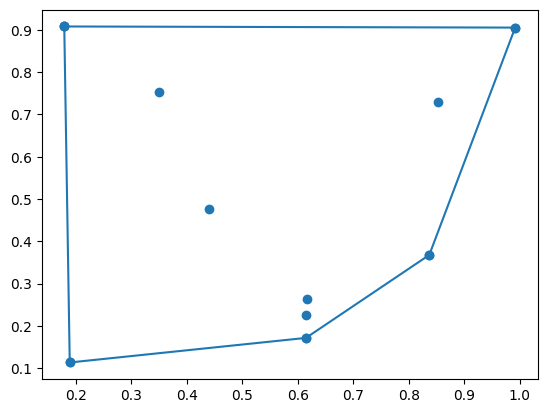

In [28]:
aff_nuage_env(read_nuage("data_nuage_10.txt"))

### Application à `n100`

On note `n10` le nuage de points définis par le fichier de données 
`data_nuage_100.txt`

Déterminer et tracer l'enveloppe convexe de ce nuage de points.

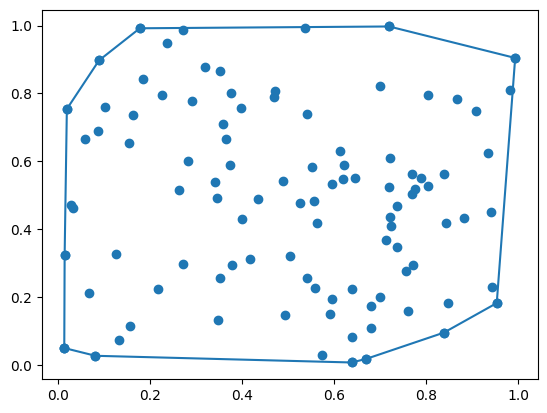

In [29]:
aff_nuage_env(read_nuage("data_nuage_100.txt"))